# Programming Exercise 7 - K-means Clustering and Principal Component Analysis

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import linalg

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

# matplotlib inline
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### K-means in example dataset

In [9]:
data1 = loadmat('data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [10]:
X1 = data1['X']
print('X1', X1.shape)

X1 (300, 2)


In [11]:
km1 = KMeans(3)
km1.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

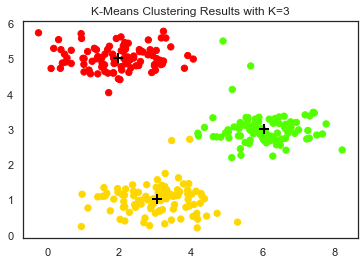

In [13]:
plt.scatter(X1[:, 0], X1[:, 1], s=40, c=km1.labels_, cmap=plt.cm.prism)
plt.title('K-Means Clustering Results with K=3')
plt.scatter(km1.cluster_centers_[:, 0],
            km1.cluster_centers_[:, 1],
            marker='+',
            s=100,
            c='k',
            linewidth=2)

### Image Compression Using K-Means Clustering

In [15]:
img = plt.imread('data/bird_small.png')
img_shape = img.shape
img_shape

(128, 128, 3)

In [16]:
A = img/255

In [17]:
AA = A.reshape(128*128, 3)

In [18]:
km2 = KMeans(16)
km2.fit(AA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
B = km2.cluster_centers_[km2.labels_].reshape(img_shape[0], img.shape[1], 3)

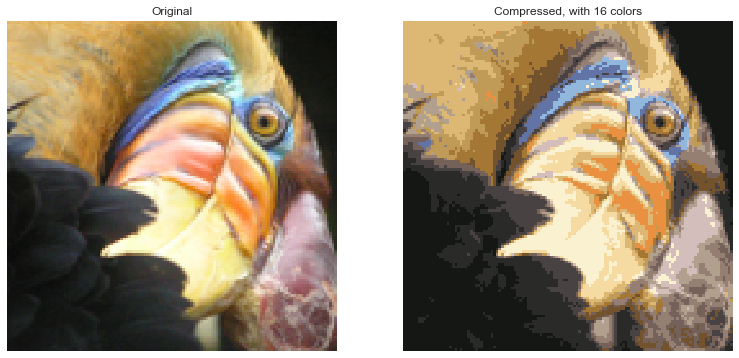

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(B*255)
ax2.set_title('Compressed, with 16 colors')

for ax in fig.axes:
    ax.axis('off')

### PCA on example dataset

Using scipy insted of scikit-learn

In [23]:
data2 = loadmat('data/ex7data1.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [24]:
X2 = data2['X']
print('X2:', X2.shape)

X2: (50, 2)


In [26]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(X2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
U, S, V = linalg.svd(scaler.transform(X2).T)
print(U)
print(S)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[9.3153915  3.63641048]


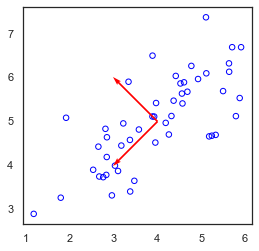

In [28]:
plt.scatter(X2[:,0], X2[:,1], s=30, edgecolors='b', facecolors='None', linewidth=1)

#set aspect ratio to 'equal' in order to show orthogonality of principal components in the plot
plt.gca().set_aspect('equal')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[0,0], U[0,1], scale=S[1], color='r')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[1,0], U[1,1], scale=S[1], color='r')